# OOI cgsn-parsers --  SAMI
hex example (ph sensor)

In [1]:
%matplotlib inline
import requests
import pandas as pd
import sys
from cgsn_parsers.parsers.parse_phsen import Parser 

In [2]:
# add cgsn-parsers tools to the path (no package yet)
path = os.path.abspath('../')
sys.path.append(path)

In [4]:
#Coastal Endurance - WA Shelf Surface Piercing Profiler Mooring
baseurl = "https://rawdata.oceanobservatories.org/files/CE07SHSM/D00003/cg_data/dcl26/phsen1/"
fname = "20160926.phsen1.log"

In [16]:
# Coastal Pioneer - Central Surface Mooring
baseurl = "https://rawdata.oceanobservatories.org/files/CP01CNSM/D00006/cg_data/dcl26/phsen1/"
fname = "20170116.phsen1.log"

In [17]:
# initialize the Parser object for METBK
phsen = Parser(baseurl + fname)

In [18]:
r = requests.get(phsen.infile, verify=True) # use verify=False for expired certificate
phsen.raw = r.content

In [19]:
len(phsen.raw), phsen.raw[-5:]

(28549, 'E644\n')

In [20]:
phsen.parse_data()

In [21]:
phsen.data.keys()

['thermistor_start',
 'record_length',
 'light_measurements',
 'record_time',
 'dcl_date_time_string',
 'thermistor_end',
 'reference_measurements',
 'record_type',
 'time',
 'voltage_battery']

In [22]:
df = pd.DataFrame(phsen.data)
df['dt_utc'] = pd.to_datetime(df.time, unit='s')
df.set_index('dt_utc', drop=True, inplace=True)
del df['dcl_date_time_string']

In [23]:
df.head()

,light_measurements,record_length,record_time,record_type,reference_measurements,thermistor_end,thermistor_start,time,voltage_battery
dt_utc,,,,,,,,,


In [24]:
# Later, can drop time, and maybe dt_utc (not the index)
df.shape, df.columns

((0, 9),
 Index([u'light_measurements', u'record_length', u'record_time', u'record_type',
        u'reference_measurements', u'thermistor_end', u'thermistor_start',
        u'time', u'voltage_battery'],
       dtype='object'))

In [13]:
df.dtypes

light_measurements         object
record_length               int64
record_time                 int64
record_type                 int64
reference_measurements     object
thermistor_end              int64
thermistor_start            int64
time                      float64
voltage_battery             int64
dtype: object

In [14]:
#extract a specific element from each list of light_measurements
df['light_0'] = [x[0] for x in df['light_measurements']]
df['light_end'] = [x[-1] for x in df['light_measurements']]

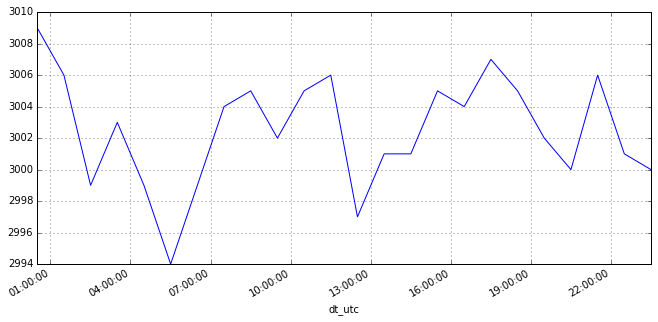

In [15]:
df['light_0'].plot(figsize=(11,5), grid='on');